In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\kunal  kumar  pandey\Downloads\archive (12)\boralasgamuwa_2012-2018.csv")

In [3]:
df.head()

,area,ticket_date,waste_type,net_weight_kg
0,Boralesgamuwa UC,2012-01-01,MSW,17340.0
1,Boralesgamuwa UC,2012-01-02,MSW,25980.0
2,Boralesgamuwa UC,2012-01-03,MSW,29220.0
3,Boralesgamuwa UC,2012-01-04,MSW,7450.0
4,Boralesgamuwa UC,2012-01-05,MSW,10520.0


In [4]:
df.isnull().sum()

area             0
ticket_date      0
waste_type       0
net_weight_kg    0
dtype: int64

## Deteceted Outlier

# sorting formet

In [7]:
df.sort_values('net_weight_kg',ascending=False)[['net_weight_kg']].head()

,net_weight_kg
1383,215040.0
1413,166680.0
1298,159020.0
1088,89580.0
1304,87670.0


In [9]:
df.sort_values('net_weight_kg',ascending=False)[['net_weight_kg']].tail()

,net_weight_kg
2720,0.0
1579,0.0
2282,0.0
2161,0.0
1584,0.0


# Graphical Formet

## box plot

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

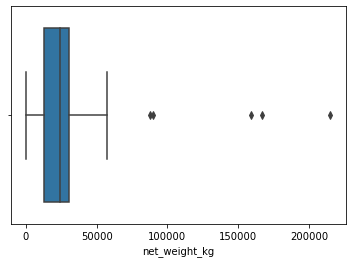

In [13]:
sns.boxplot(data=df,x='net_weight_kg')
plt.show()

## displot

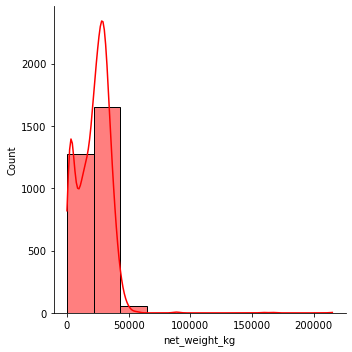

In [15]:
sns.displot(data=df, x='net_weight_kg',bins=10,kde=True,color='red')
plt.show()

## Scatter plot

In [24]:
q3=df['net_weight_kg'].quantile(0.75)
q3

30682.5

In [26]:
q1=df['net_weight_kg'].quantile(0.25)
q1

12767.5

In [27]:
iqr=q3-q1
iqr

17915.0

In [28]:
uper=q3 + (1.5 * iqr)
lower=q1 - (1.5 * iqr)

In [29]:
print(uper , lower)

57555.0 -14105.0


# how to handel the outlier

## delete upper and lower value below

In [30]:
import numpy as np

In [36]:
upper=np.where(df['net_weight_kg']>=uper)

In [37]:
low=np.where(df['net_weight_kg']<=lower)

In [38]:
df.drop(upper[0],inplace=True)

In [39]:
df.drop(low[0],inplace=True)

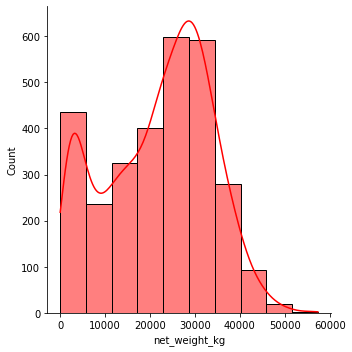

In [40]:
sns.displot(data=df, x='net_weight_kg',bins=10,kde=True,color='red')
plt.show()

# Replace outlier

In [41]:
## converrt 'net_weight_kg' to array .value
arr=df['net_weight_kg'].values

In [42]:
true_index=(lower<arr) & (uper<arr)

In [43]:
true_index

array([False, False, False, ..., False, False, False])

In [45]:
mid=np.median(df['net_weight_kg'][true_index])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [46]:
mid

nan

In [47]:
false_index=~true_index
df['net_weight_kg'].values[false_index]=mid

In [48]:
df

,area,ticket_date,waste_type,net_weight_kg
0,Boralesgamuwa UC,2012-01-01,MSW,NaN
1,Boralesgamuwa UC,2012-01-02,MSW,NaN
2,Boralesgamuwa UC,2012-01-03,MSW,NaN
3,Boralesgamuwa UC,2012-01-04,MSW,NaN
4,Boralesgamuwa UC,2012-01-05,MSW,NaN
...,...,...,...,...
2983,Boralesgamuwa UC,2018-12-29,MSW,NaN
2984,Boralesgamuwa UC,2018-12-29,Sorted Organic Waste,NaN
2985,Boralesgamuwa UC,2018-12-30,MSW,NaN
2986,Boralesgamuwa UC,2018-12-31,MSW,NaN
